In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
sns.set_context('poster')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer
import xgboost as xgb
import lightgbm as lgb

# Importing from my own modules
import sys
sys.path.append('../financial_forecasting/')
from utils import load_data, wMSE, train_and_test_models
from preprocessing import Imputer, LogTransformer, MeanEncoder, TreeBinner

/Users/km1308/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/km1308/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/km1308/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
make_scorer?

# Load preprocessed data

In [2]:
X_train = pd.read_csv('../data/preprocessed/train.csv')
X_val = pd.read_csv('../data/preprocessed/validation.csv')
X_test = pd.read_csv('../data/preprocessed/test.csv')

weights_train = pd.read_csv('../data/preprocessed/train_weights.csv', squeeze=True)
weights_val = pd.read_csv('../data/preprocessed/validation_weights.csv', squeeze=True)

y_train = pd.read_csv('../data/preprocessed/train_target.csv', squeeze=True)
y_val = pd.read_csv('../data/preprocessed/validation_target.csv', squeeze=True)

# Use early stopping to determine optimal number of trees

In [4]:
feats= ['Day', 'Market', 'Market_mean_encoded', 'Stock', 'Stock_mean_encoded',
       'x0', 'x0_log10', 'x0_log10_diff', 'x1_log10', 'x1_log10_diff',
       'x2_log10', 'x2_log10_diff', 'x3A', 'x3A_log10', 'x3A_log10_diff',
       'x3B', 'x3B_binned', 'x3B_log10', 'x3C', 'x3C_log10', 'x3D',
       'x3D_log10', 'x3D_log10_diff', 'x3E', 'x3E_log10', 'x3E_log10_diff',
       'x4', 'x4_binned', 'x4_log10_diff', 'x5', 'x5_binned', 'x5_log10',
       'x5_log10_diff', 'x6', 'x6_binned', 'x6_log10_diff']

In [3]:
# Custom validation set evaluation metric to pass to xgboost 
def eval_error(preds, dtrain): 
    labels = dtrain.get_label()
    assert len(preds) == len(labels)
    labels = np.array(labels.tolist())
    preds = np.array(preds.tolist())
    err = wMSE(preds=preds, y=labels, weights=weights_val)
    return 'wMSE', err*1e6

In [ ]:
def eval_error(y, y_pred, weights): 
    err = wMSE(preds=y_pred, y=y, weights=weights)
    return err

In [4]:
my_new_score = make_scorer(eval_error, greater_is_better=False)

In [35]:
model = xgb.sklearn.XGBRegressor(n_estimators=700, n_jobs=-1)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric=eval_error, verbose=True, early_stopping_rounds=30)

[0]	validation_0-rmse:0.44993	validation_0-wMSE:2.99935e+06
Multiple eval metrics have been passed: 'validation_0-wMSE' will be used for early stopping.

Will train until validation_0-wMSE hasn't improved in 30 rounds.
[1]	validation_0-rmse:0.404937	validation_0-wMSE:2.42954e+06
[2]	validation_0-rmse:0.364443	validation_0-wMSE:1.968e+06
[3]	validation_0-rmse:0.327999	validation_0-wMSE:1.59414e+06
[4]	validation_0-rmse:0.295199	validation_0-wMSE:1.2913e+06
[5]	validation_0-rmse:0.265679	validation_0-wMSE:1.046e+06
[6]	validation_0-rmse:0.239111	validation_0-wMSE:847307
[7]	validation_0-rmse:0.2152	validation_0-wMSE:686357
[8]	validation_0-rmse:0.19368	validation_0-wMSE:555985
[9]	validation_0-rmse:0.174312	validation_0-wMSE:450379
[10]	validation_0-rmse:0.156881	validation_0-wMSE:364835
[11]	validation_0-rmse:0.141194	validation_0-wMSE:295542
[12]	validation_0-rmse:0.127075	validation_0-wMSE:239412
[13]	validation_0-rmse:0.114368	validation_0-wMSE:193945
[14]	validation_0-rmse:0.102931	

[139]	validation_0-rmse:0.000906	validation_0-wMSE:1.07311
[140]	validation_0-rmse:0.000906	validation_0-wMSE:1.07324
[141]	validation_0-rmse:0.000906	validation_0-wMSE:1.07256
[142]	validation_0-rmse:0.000906	validation_0-wMSE:1.07211
[143]	validation_0-rmse:0.000906	validation_0-wMSE:1.0724
[144]	validation_0-rmse:0.000906	validation_0-wMSE:1.07199
[145]	validation_0-rmse:0.000905	validation_0-wMSE:1.0719
[146]	validation_0-rmse:0.000905	validation_0-wMSE:1.07173
[147]	validation_0-rmse:0.000905	validation_0-wMSE:1.07167
[148]	validation_0-rmse:0.000905	validation_0-wMSE:1.06914
[149]	validation_0-rmse:0.000905	validation_0-wMSE:1.06912
[150]	validation_0-rmse:0.000905	validation_0-wMSE:1.06825
[151]	validation_0-rmse:0.000905	validation_0-wMSE:1.0685
[152]	validation_0-rmse:0.000905	validation_0-wMSE:1.06831
[153]	validation_0-rmse:0.000905	validation_0-wMSE:1.06795
[154]	validation_0-rmse:0.000905	validation_0-wMSE:1.06797
[155]	validation_0-rmse:0.000905	validation_0-wMSE:1.06811


[279]	validation_0-rmse:0.000904	validation_0-wMSE:1.04702
[280]	validation_0-rmse:0.000904	validation_0-wMSE:1.04699
[281]	validation_0-rmse:0.000904	validation_0-wMSE:1.04708
[282]	validation_0-rmse:0.000904	validation_0-wMSE:1.04742
[283]	validation_0-rmse:0.000904	validation_0-wMSE:1.0473
[284]	validation_0-rmse:0.000904	validation_0-wMSE:1.04724
[285]	validation_0-rmse:0.000904	validation_0-wMSE:1.04727
[286]	validation_0-rmse:0.000904	validation_0-wMSE:1.04721
[287]	validation_0-rmse:0.000904	validation_0-wMSE:1.04658
[288]	validation_0-rmse:0.000904	validation_0-wMSE:1.04652
[289]	validation_0-rmse:0.000904	validation_0-wMSE:1.04667
[290]	validation_0-rmse:0.000904	validation_0-wMSE:1.04663
[291]	validation_0-rmse:0.000904	validation_0-wMSE:1.04664
[292]	validation_0-rmse:0.000904	validation_0-wMSE:1.04661
[293]	validation_0-rmse:0.000904	validation_0-wMSE:1.04665
[294]	validation_0-rmse:0.000904	validation_0-wMSE:1.04643
[295]	validation_0-rmse:0.000904	validation_0-wMSE:1.0466

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

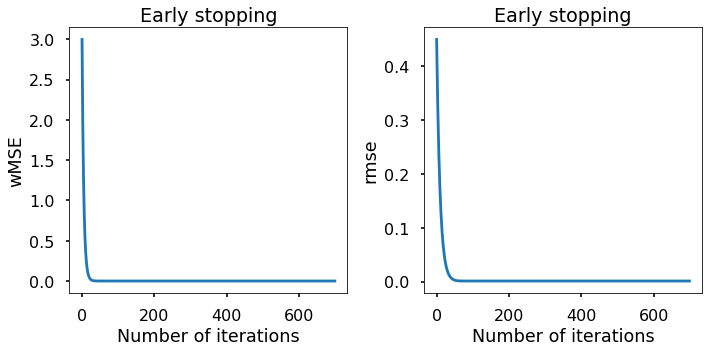

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,5])
ax[0].plot(model.evals_result()['validation_0']['wMSE'])
ax[0].set_ylabel('wMSE')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Early stopping')

ax[1].plot(model.evals_result()['validation_0']['rmse'])
ax[1].set_ylabel('rmse')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Early stopping')

plt.tight_layout()

In [63]:
# Custom validation set evaluation metric to pass to lightgbm
def eval_error_lgb(preds, dtrain): 
    labels = dtrain
    assert len(preds) == len(labels)
    labels = np.array(labels.tolist())
    preds = np.array(preds.tolist())
    err = wMSE(preds=preds, y=labels, weights=weights_val)
    return 'wMSE', err*1e6, False

In [67]:
model = lgb.sklearn.LGBMRegressor(n_estimators=700, n_jobs=-1)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric=eval_error_lgb, verbose=True, early_stopping_rounds=30)

[1]	valid_0's l2: 9.8206e-07	valid_0's wMSE: 1.53371
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l2: 9.57123e-07	valid_0's wMSE: 1.46317
[3]	valid_0's l2: 9.36845e-07	valid_0's wMSE: 1.40897
[4]	valid_0's l2: 9.18085e-07	valid_0's wMSE: 1.35744
[5]	valid_0's l2: 9.02684e-07	valid_0's wMSE: 1.31494
[6]	valid_0's l2: 8.90652e-07	valid_0's wMSE: 1.28172
[7]	valid_0's l2: 8.7915e-07	valid_0's wMSE: 1.24789
[8]	valid_0's l2: 8.70389e-07	valid_0's wMSE: 1.22496
[9]	valid_0's l2: 8.62743e-07	valid_0's wMSE: 1.20433
[10]	valid_0's l2: 8.56567e-07	valid_0's wMSE: 1.18838
[11]	valid_0's l2: 8.50851e-07	valid_0's wMSE: 1.17436
[12]	valid_0's l2: 8.45015e-07	valid_0's wMSE: 1.15999
[13]	valid_0's l2: 8.40297e-07	valid_0's wMSE: 1.14852
[14]	valid_0's l2: 8.36298e-07	valid_0's wMSE: 1.13914
[15]	valid_0's l2: 8.32289e-07	valid_0's wMSE: 1.12712
[16]	valid_0's l2: 8.29246e-07	valid_0's wMSE: 1.12161
[17]	valid_0's l2: 8.25769e-07	valid_0's wMSE: 1.11388
[18]	valid_0's

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=700,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

# Train models 

In [88]:
# Try number of iterations recommended by early stopping

enabled_vars = feats

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=360, n_jobs=-1)), 
                      ('lgboost', lgb.sklearn.LGBMRegressor(n_estimators=60, n_jobs=-1)),
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 9.32075513062983e-07 Test error: 9.894273116311004e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=60,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
Train error: 9.423105335945055e-07 Test error: 9.929691710673907e-07 



In [73]:
# Try more iterations 

enabled_vars = feats

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=700, n_jobs=-1)), 
                      ('lgboost', lgb.sklearn.LGBMRegressor(n_estimators=700, n_jobs=-1)),
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 8.718106383687781e-07 Test error: 9.7838339737716e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=700,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
Train error: 6.37821141588728e-07 Test error: 9.733115952261306e-07 



Adding further iterations introduces a considerable amount of overfitting but mildly improves performance on test set. Consider regularising.

In [106]:
# Experiment with regularisation

enabled_vars = feats

models = OrderedDict([
                      ('lgboost', lgb.sklearn.LGBMRegressor(n_estimators=350, n_jobs=-1, max_depth=5, reg_lambda=10.0)),
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=5, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=350,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=10.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
Train error: 8.207052447850005e-07 Test error: 9.68109894359826e-07 



In [107]:
# Experiment with regularisation

enabled_vars = feats

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=350, n_jobs=-1, reg_lambda=10)), 
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 9.525672356098716e-07 Test error: 9.912638194535437e-07 



# Train final model

In [113]:
enabled_vars = feats

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=700, n_jobs=-1)), 
                      ('lgboost_reg', lgb.sklearn.LGBMRegressor(n_estimators=350, n_jobs=-1, max_depth=5, reg_lambda=10.0)),
                      ('lgboost', lgb.sklearn.LGBMRegressor(n_estimators=700))
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 8.718106383687781e-07 Test error: 9.7838339737716e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=5, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=350,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=10.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
Train error: 8.207052447849649e-07 Test error: 9.681070271123806e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, co

In [114]:
# Model stacking
# Validation set
preds = (df_preds_test.xgboost_preds_test + 
         df_preds_test.lgboost_preds_test +
         df_preds_test.lgboost_reg_preds_test
        )/3
wMSE(preds=preds, y=y_val, weights=weights_val)

9.550210152570293e-07

In [116]:
# Model stacking
# Test set

p1 = models['xgboost'].predict(X_test.loc[:, enabled_vars])
p2 = models['lgboost'].predict(X_test.loc[:, enabled_vars])
p3 = models['lgboost_reg'].predict(X_test.loc[:, enabled_vars])


preds_test = pd.DataFrame(np.c_[p1,p2,p3], columns=['xgb','lgb', 'lgbr'], index=X_test.index)

preds_test['y'] = preds_test.mean(axis=1)

preds_test.head()

,xgb,lgb,lgbr,y
0,0.000188,0.000273,0.000218,0.000226
1,-0.000008,-0.000080,-0.000097,-0.000061
2,0.000005,-0.000009,-0.000004,-0.000002
3,0.000040,0.000040,0.000036,0.000039
4,0.000499,0.000550,0.000519,0.000523


In [117]:
preds_test.y.to_csv('../data/output_11_lgb350reg_lgb700_xgb700_with_log_diff_as_feats_with_param_tuning.csv', index=True, header=True)

# Train final model 2

In [129]:
enabled_vars = feats

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=700, n_jobs=-1)), 
                      ('lgboost_reg', lgb.sklearn.LGBMRegressor(n_estimators=350, n_jobs=-1, max_depth=5, reg_lambda=10.0)),
                      ('lgboost', lgb.sklearn.LGBMRegressor(n_estimators=700)),
                      ('xgboost_reg', xgb.sklearn.XGBRegressor(n_estimators=700, n_jobs=-1, reg_lambda=10.0, grow_policy='lossguide', tree_method='hist', max_depth=5)), 
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 8.718106383687781e-07 Test error: 9.7838339737716e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=5, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=350,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=10.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
Train error: 8.207052447849712e-07 Test error: 9.681071738729553e-07 

Fitting: LGBMRegressor(boosting_type='gbdt', class_weight=None, co

In [131]:
# Model stacking
# Validation set
preds = (df_preds_test.xgboost_preds_test + 
         df_preds_test.lgboost_preds_test +
         df_preds_test.xgboost_reg_preds_test +
         df_preds_test.lgboost_reg_preds_test
        )/4
wMSE(preds=preds, y=y_val, weights=weights_val)

9.520322076910166e-07

In [132]:
# Model stacking
# Test set

p1 = models['xgboost'].predict(X_test.loc[:, enabled_vars])
p2 = models['lgboost'].predict(X_test.loc[:, enabled_vars])
p3 = models['lgboost_reg'].predict(X_test.loc[:, enabled_vars])
p4 = models['xgboost_reg'].predict(X_test.loc[:, enabled_vars])

preds_test = pd.DataFrame(np.c_[p1,p2,p3,p4], columns=['xgb','lgb', 'lgbr', 'xgbr'], index=X_test.index)

preds_test['y'] = preds_test.mean(axis=1)

preds_test.head()

,xgb,lgb,lgbr,xgbr,y
0,0.000188,0.000273,0.000218,0.000227,0.000226
1,-0.000008,-0.000080,-0.000097,-0.000239,-0.000106
2,0.000005,-0.000009,-0.000004,-0.000009,-0.000004
3,0.000040,0.000040,0.000036,0.000043,0.000040
4,0.000499,0.000550,0.000519,0.000506,0.000519


In [133]:
preds_test.y.to_csv('../data/output_12_lgb350reg_lgb700_xgb700_xgb700reg_with_log_diff_as_feats_with_param_tuning.csv', index=True, header=True)

# Model stacking and apply to test set for submission

In [74]:
# Model stacking
# Validation set
preds = (df_preds_test.xgboost_preds_test + df_preds_test.lgboost_preds_test)/2
wMSE(preds=preds, y=y_val, weights=weights_val)

9.560562578348855e-07

Averaging the two models reduced the validation set error considerably

In [75]:
# Model stacking
# Test set

p1 = models['xgboost'].predict(X_test.loc[:, enabled_vars])
p2 = models['lgboost'].predict(X_test.loc[:, enabled_vars])

preds_test = pd.DataFrame(np.c_[p1,p2], columns=['xgb','lgb'], index=X_test.index)

preds_test['y'] = preds_test.mean(axis=1)

preds_test.head()

,xgb,lgb,y
0,0.000188,0.000273,0.000230
1,-0.000008,-0.000080,-0.000044
2,0.000005,-0.000009,-0.000002
3,0.000040,0.000040,0.000040
4,0.000499,0.000550,0.000525


In [76]:
preds_test.y.to_csv('../data/output_10_lgb700_xgb700_with_log_diff_as_feats.csv', index=True, header=True)